In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

https://blog.csdn.net/on2way/article/details/72773771  简单理解与实验生成对抗网络GAN

https://blog.csdn.net/c2a2o2/article/details/76861695  生成式对抗网络GAN有哪些最新的发展，可以实际应用到哪些场景中

https://zhuanlan.zhihu.com/p/25071913  https://github.com/igul222/improved_wgan_training   令人拍案叫绝的Wasserstein GAN

https://blog.csdn.net/qq_25737169/article/details/78857724

    GAN的广泛应用

    1. GAN本身是一种生成式模型，所以在数据生成上用的是最普遍的，最常见的是图片生成，常用的有DCGAN WGAN，BEGAN，个人感觉在BEGAN的效果最好而且最简单。

    2. GAN本身也是一种无监督学习的典范，因此它在无监督学习，半监督学习领域都有广泛的应用，比较好的论文有

        Improved Techniques for Training GANs

        Bayesian GAN（最新）

        Good Semi-supervised Learning

    3. 不仅在生成领域，GAN在分类领域也占有一席之地，简单来说，就是替换判别器为一个分类器，做多分类任务，而生成器仍然做生成任务，辅助分类器训练。

    4. GAN可以和强化学习结合，目前一个比较好的例子就是seq-GAN

    5. 目前比较有意思的应用就是GAN用在图像风格迁移，图像降噪修复，图像超分辨率了，都有比较好的结果，详见pix-2-pix GAN 和cycle GAN。但是GAN目前在视频生成上和预测上还不是很好。

    6. 目前也有研究者将GAN用在对抗性攻击上，具体就是训练GAN生成对抗文本，有针对或者无针对的欺骗分类器或者检测系统等等，但是目前没有见到很典范的文章。
    
    GAN的思想是是一种二人零和博弈思想（two-player game），博弈双方的利益之和是一个常数，比如两个人掰手腕，假设总的空间是一定的，你的力气大一点，那你就得到的空间多一点，相应的我的空间就少一点，相反我力气大我就得到的多一点，但有一点是确定的就是，我两的总空间是一定的，这就是二人博弈，但是呢总利益是一定的。

    引申到GAN里面就是可以看成，GAN中有两个这样的博弈者，一个人名字是生成模型（G），另一个人名字是判别模型（D）。他们各自有各自的功能。
    
    相同点是：

    1) 这两个模型都可以看成是一个黑匣子，接受输入然后有一个输出，类似一个函数，一个输入输出映射。

    不同点是：

    1) 生成模型功能：比作是一个样本生成器，输入一个噪声/样本，然后把它包装成一个逼真的样本，也就是输出。
    2) 判别模型：比作一个二分类器（如同0-1分类器），来判断输入的样本是真是假。（就是输出值大于0.5还是小于0.5）;    
    
    直接上一张个人觉得解释的好的图说明
    
![Image of Yaktocat](20170526212141083.jpg)

    在之前，我们首先明白在使用GAN的时候的2个问题

    我们有什么？ 
        比如上面的这个图，我们有的只是真实采集而来的人脸样本数据集，仅此而已，而且很关键的一点是我们连人脸数据集的类标签都没有，也就是我们不知道那个人脸对应的是谁。

    我们要得到什么 
        至于要得到什么，不同的任务得到的东西不一样，我们只说最原始的GAN目的，那就是我们想通过输入一个噪声，模拟得到一个人脸图像，这个图像可以非常逼真以至于以假乱真。
        
     GAN大概的目的与设计思路，那么一个很自然的问题来了就是我们该如何用数学方法解决这么一个对抗问题。这就涉及到如何训练这样一个生成对抗网络模型了，还是先上一个图，用图来解释最直接：
![Image of Yaktocat](20170526212323758.jpg)

    需要注意的是生成模型与对抗模型可以说是完全独立的两个模型，好比就是完全独立的两个神经网络模型，他们之间没有什么联系。

    好了那么训练这样的两个模型的大方法就是：单独交替迭代训练。
    
    因为是2个网络，不好一起训练，所以才去交替迭代训练，我们一一来看。 

    假设现在生成网络模型已经有了（当然可能不是最好的生成网络），那么给一堆随机数组，就会得到一堆假的样本集（因为不是最终的生成模型，那么现在生成网络可能就处于劣势，导致生成的样本就不咋地，可能很容易就被判别网络判别出来了说这货是假冒的），但是先不管这个，假设我们现在有了这样的假样本集，真样本集一直都有，现在我们人为的定义真假样本集的标签，因为我们希望真样本集的输出尽可能为1，假样本集为0，很明显这里我们就已经默认真样本集所有的类标签都为1，而假样本集的所有类标签都为0. 有人会说，在真样本集里面的人脸中，可能张三人脸和李四人脸不一样呀，对于这个问题我们需要理解的是，我们现在的任务是什么，我们是想分样本真假，而不是分真样本中那个是张三label、那个是李四label。况且我们也知道，原始真样本的label我们是不知道的。回过头来，我们现在有了真样本集以及它们的label（都是1）、假样本集以及它们的label（都是0），这样单就判别网络来说，此时问题就变成了一个再简单不过的有监督的二分类问题了，直接送到神经网络模型中训练就完事了。假设训练完了，下面我们来看生成网络。
    。。。  。。。
    
    文字的描述相信已经让大多数的人知道了这个过程，下面我们来看看原文中几个重要的数学公式描述，首先我们直接上原始论文中的目标公式吧：

$$ minGmaxDV(D,G)=Ex∼pdata(x)[log(D(x))]+Ez∼pz(z)[log(1−D(G(z)))] $$
    
    这个公式说白了就是一个最大最小优化问题，其实对应的也就是上述的两个优化过程。有人说如果不看别的，能达看到这个公式就拍案叫绝的地步，那就是机器学习的顶级专家，哈哈，真是前路漫漫。同时也说明这个简单的公式意义重大。这个公式既然是最大最小的优化，那就不是一步完成的，其实对比我们的分析过程也是这样的，这里现优化D，然后在取优化G，本质上是两个优化问题，把拆解就如同下面两个公式：

    优化D：

$$ maxDV(D,G)=Ex∼pdata(x)[log(D(x))]+Ez∼pz(z)[log(1−D(G(z)))] $$

    优化G：

$$ minGV(D,G)=Ez∼pz(z)[log(1−D(G(z)))] $$

    可以看到，优化D的时候，也就是判别网络，其实没有生成网络什么事，后面的G(z)这里就相当于已经得到的假样本。优化D的公式的第一项，使的真样本x输入的时候，得到的结果越大越好，可以理解，因为需要真样本的预测结果越接近于1越好嘛。对于假样本，需要优化是的其结果越小越好，也就是D(G(z))越小越好，因为它的标签为0。但是呢第一项是越大，第二项是越小，这不矛盾了，所以呢把第二项改成1-D(G(z))，这样就是越大越好，两者合起来就是越大越好。 那么同样在优化G的时候，这个时候没有真样本什么事，所以把第一项直接却掉了。这个时候只有假样本，但是我们说这个时候是希望假样本的标签是1的，所以是D(G(z))越大越好，但是呢为了统一成1-D(G(z))的形式，那么只能是最小化1-D(G(z))，本质上没有区别，只是为了形式的统一。之后这两个优化模型可以合并起来写，就变成了最开始的那个最大最小目标函数了。    
    

In [4]:
# -*- coding: utf-8 -*-
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Hyper Parameters
BATCH_SIZE = 64
LR_G = 0.0001           # learning rate for generator
LR_D = 0.0001           # learning rate for discriminator
N_IDEAS = 5             # think of this as number of ideas for generating an art work (Generator)
ART_COMPONENTS = 15     # it could be total point G can draw in the canvas
PAINT_POINTS = np.vstack([np.linspace(-1, 1, ART_COMPONENTS) for _ in range(BATCH_SIZE)])

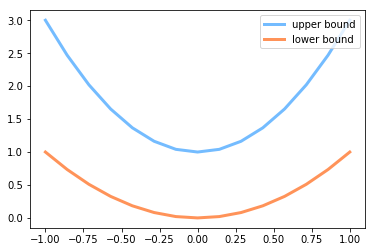

In [9]:
# show our beautiful painting range
plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
plt.legend(loc='upper right')
plt.show()

In [11]:
def artist_works():     # painting from the famous artist (real target)
    a = np.random.uniform(1, 2, size=BATCH_SIZE)[:, np.newaxis]
    paintings = a * np.power(PAINT_POINTS, 2) + (a-1)
    paintings = torch.from_numpy(paintings).float()
    return Variable(paintings)

G = nn.Sequential(                      # Generator
    nn.Linear(N_IDEAS, 128),            # random ideas (could from normal distribution)
    nn.ReLU(),
    nn.Linear(128, ART_COMPONENTS),     # making a painting from these random ideas
)

D = nn.Sequential(                      # Discriminator
    nn.Linear(ART_COMPONENTS, 128),     # receive art work either from the famous artist or a newbie like G
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid(),                       # tell the probability that the art work is made by artist
)
opt_D = torch.optim.Adam(D.parameters(), lr=LR_D)
opt_G = torch.optim.Adam(G.parameters(), lr=LR_G)

plt.ion()   # something about continuous plotting


In [15]:
for step in range(10000):
    artist_paintings = artist_works()           # real painting from artist
    G_ideas = Variable(torch.randn(BATCH_SIZE, N_IDEAS))    # random ideas
    G_paintings = G(G_ideas)                    # fake painting from G (random ideas)

    prob_artist0 = D(artist_paintings)          # D try to increase this prob
    prob_artist1 = D(G_paintings)               # D try to reduce this prob

    # D_loss 目的 prob_artist0 变大， prob_artist1变小， 前面加负号，表示当torch.mean()越大的时候 ， D_loss越小
    D_loss = - torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))
    
    # G_loss ， 目的 prob_artist1 变大
    G_loss = torch.mean(torch.log(1. - prob_artist1))

    opt_D.zero_grad()
#     D_loss.backward(retain_variables=True)      # retain_variables for reusing computational graph
    D_loss.backward(retain_graph=True) # 如不加retain_graph=True, 则会出现下面的错误 
    # 每次 backward() 时，默认会把整个计算图free掉。一般情况下是每次迭代，只需一次 forward() 和一次 backward() ,前向运
    # 算forward() 和反向传播backward()是成对存在的，一般一次backward()也是够用的。但是不排除，由于自定义loss等的复杂性，
    # 需要一次forward()，多个不同loss的backward()来累积同一个网络的grad,来更新参数。于是，若在当前backward()后，不执行
    # forward() 而可以执行另一个backward()，需要在当前backward()时，指定保留计算图，即backward(retain_graph)。
#     D_loss.backward() # Trying to backward through the graph a second time, but the buffers have 
                      #   already been freed. Specify retain_graph=True when calling backward the first time
    opt_D.step()

    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()

    if step % 50 == 0:  # plotting
        plt.cla()
        plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
        plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 15})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 15})
        plt.ylim((0, 3));plt.legend(loc='upper right', fontsize=12);plt.draw();plt.pause(0.01)

plt.ioff()
plt.show()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.